------------ALL DONE!------------


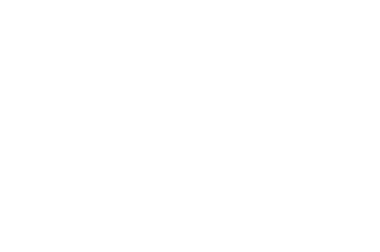

In [21]:
'''
background removal:removing the background, keeping only the valid area of the plant leaves
input:plant images
output:valid area for plant images

'''
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

path = 'test/'
savepath = "result/"

cnt=0

filelist = os.listdir(path)
for file in filelist:
    img = cv2.imread(path+file)
    
    mask = np.zeros(img.shape[:2], np.uint8)
    SIZE = (1, 65)
    bgdModle = np.zeros(SIZE, np.float64)
    fgdModle = np.zeros(SIZE, np.float64)
    rect = (1, 1, img.shape[1]-40, img.shape[0])
    cv2.grabCut(img, mask, rect, bgdModle, fgdModle, 5, cv2.GC_INIT_WITH_RECT)

    mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
    img *= mask2[:, :, np.newaxis]
    
   
    
    
    filename = os.path.splitext(file)[0]
    #print(filename)
    plt.axis('off')
    cv2.imwrite(savepath+filename+'.jpg',img)
    
    cnt+=1
    if cnt%100==0:
        print(cnt)
print('------------ALL DONE!------------')




